# 1 IOU

In [2]:
import numpy as np


def Iou(box1, box2, wh = False):
    if wh: # 用极坐标表示
        xmin1, ymin1, xmax1, ymax1 = box1
        xmin2, ymin2, xmax2, ymax2 = box2
    else:
        xmin1, ymin1 = int(box1[0] - box1[2]/2.0), int(box1[1] - box1[3]/2.0)
        xmax1, ymax1 = int(box1[0] + box1[2]/2.0), int(box1[1] + box1[3]/2.0)
        xmin2, ymin2 = int(box2[0] - box2[2]/2.0), int(box2[1] - box2[3]/2.0)
        xmax2, ymax2 = int(box2[0] + box2[2]/2.0), int(box2[1] + box2[3]/2.0)

    # 矩形框交集对应的左上角和右下角坐标
    xx1 = np.max([xmin1, xmin2])
    yy1 = np.max([ymin1, ymin2])
    xx2 = np.min([xmax1, xmax2])
    yy2 = np.min([ymax1, ymax2])

    # 计算两个矩形框的面积
    area1 = (xmax1 - xmin1)*(ymax1 - ymin1)
    area2 = (xmax2 - xmin2)*(ymax2 - ymin2)

    # 计算交集面积
    inter_area = (np.max[0, xx2 - xx1]) * (np.max([0, yy2, yy1]))
    # 计算并集面积
    union_area = area1 + area2 - inter_area
    # 计算交并比IOU
    Iou = inter_area/(union_area + 1e-6)

    return Iou

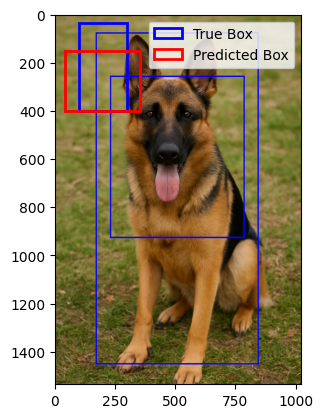

TypeError: 'numpy._ArrayFunctionDispatcher' object is not subscriptable

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# 真实框与预测框
True_bbox, pre_bbox = [100, 35, 298, 400], [40, 150, 355, 398]

img = plt.imread('dog.png')

# 创建图像窗口和坐标轴
fig, ax = plt.subplots()
ax.imshow(img)

# 将边界框（左上x，左上y，右下x，右下y）格式转换成为matplotlib格式：（（左上x，左上y），宽，高）
# 真实框绘制
ax.add_patch(
    plt.Rectangle(xy = (True_bbox[0], True_bbox[1]),
                  width=True_bbox[2] - True_bbox[0],
                  height=True_bbox[3] - True_bbox[1],
                  fill = False,
                  edgecolor='blue',
                  linewidth=2,
                  label = "True Box")
)
# 预测框绘制
ax.add_patch(
    patches.Rectangle(
        xy=(pre_bbox[0], pre_bbox[1]),
        width=pre_bbox[2] - pre_bbox[0],
        height=pre_bbox[3] - pre_bbox[1],
        fill=False,
        edgecolor='red',
        linewidth=2,
        label='Predicted Box'
    )
)
plt.legend()
plt.show()

# 计算iou
Iou(True_bbox, pre_bbox)

# 2 NMS

In [8]:
def nms(boxes, score, thre):
    # 容错处理
    if len(boxes) == 0:
        return [], []
    # 类型转换:默认使用极坐标
    boxes = np.array(boxes)
    score = np.array(score)
    # 获取左上角，右下角坐标
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    # 面积
    areas = (x2 - x1)*(y2 - y1)
    # NMS
    picked_boxes = []
    picked_score = []
    # 排序
    order = np.argsort(score)
    while order.size > 0:
        index = order[-1]
        # 保留下来的框
        picked_boxes.append(boxes[index])
        picked_score.append(score[index])
        # 交集的各个坐标
        x11 = np.maximum(x1[index], x1[order[:-1]])
        y11 = np.maximum(y1[index], y1[order[:-1]])
        x22 = np.minimum(x2[index], x2[order[:-1]])
        y22 = np.minimum(y2[index], y2[order[:-1]])
        # 宽，高，面积
        w = np.maximum(0.0, x22 - x11)
        h = np.maximum(0.0, y22 - y11)
        inter_area = w*h
        # IOu
        Iou = inter_area/(areas[index] + areas[order[:-1]] - inter_area)
        # 删除冗余框
        keep_boxes = np.where(Iou<thre)
        # 更新order
        order = order[keep_boxes]
    return picked_boxes, picked_score

In [9]:
bounding = [(187, 82, 337, 317) ,(150, 67, 305, 282),(246, 121, 368, 304)]
confidence_score = [0.9, 0.65, 0.8]
threshold = 0.5

In [10]:
box, score = nms(bounding, confidence_score, threshold)

In [11]:
box

[array([187,  82, 337, 317]), array([246, 121, 368, 304])]

In [12]:
score

[0.9, 0.8]